In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [10]:
%matplotlib inline

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [58]:
df.groupby(["Make", "Model", "Trim"]).count()

Price  Mileage  Type  Cylinder  \
Make      Model       Trim                                                  
Buick     Century     Sedan 4D                10       10    10        10   
          Lacrosse    CX Sedan 4D             10       10    10        10   
                      CXL Sedan 4D            10       10    10        10   
                      CXS Sedan 4D            10       10    10        10   
          Lesabre     Custom Sedan 4D         10       10    10        10   
                      Limited Sedan 4D        10       10    10        10   
          Park Avenue Sedan 4D                10       10    10        10   
                      Special Ed Ultra 4D     10       10    10        10   
Cadillac  CST-V       Sedan 4D                10       10    10        10   
          CTS         Sedan 4D                10       10    10        10   
          Deville     DHS Sedan 4D            10       10    10        10   
                      DTS Sedan 4D            10       10    10        10   
                      Sedan 4D                10       10    10        10   
          STS-V6      Sedan 4D                10       10    10        10   
          STS-V8      Sedan 4D                10       10    10        10   
          XLR-V8      Hardtop Conv 2D         10       10    10        10   
Chevrolet AVEO        LS Hatchback 4D         10       10    10        10   
                      LS Sedan 4D             10       10    10        10   
                      LT Hatchback 4D         10       10    10        10   
                      LT Sedan 4D             10       10    10        10   
                      SVM Hatchback 4D        10       10    10        10   
                      SVM Sedan 4D            10       10    10        10   
          Cavalier    Coupe 2D                10       10    10        10   
                      LS Coupe 2D             10       10    10        10   
                      LS Sedan 4D             10       10    10        10   
                      LS Sport Coupe 2D       10       10    10        10   
                      LS Sport Sedan 4D       10       10    10        10   
                      Sedan 4D                10       10    10        10   
          Classic     Sedan 4D                10       10    10        10   
          Cobalt      Coupe 2D                10       10    10        10   
...                                          ...      ...   ...       ...   
Pontiac   Bonneville  GXP Sedan 4D            10       10    10        10   
                      SE Sedan 4D             10       10    10        10   
                      SLE Sedan 4D            10       10    10        10   
          G6          GT Sedan 4D             10       10    10        10   
                      Sedan 4D                10       10    10        10   
          GTO         Coupe 2D                10       10    10        10   
          Grand Am    GT Coupe 2D             10       10    10        10   
                      SE Sedan 4D             10       10    10        10   
          Grand Prix  GT Sedan 4D             10       10    10        10   
                      GTP Sedan 4D            10       10    10        10   
                      Sedan 4D                10       10    10        10   
          Sunfire     Coupe 2D                10       10    10        10   
          Vibe        AWD Sportwagon 4D       10       10    10        10   
                      GT Sportwagon           10       10    10        10   
                      Sportwagon 4D           10       10    10        10   
SAAB      9-2X AWD    Linear Wagon 4D          4        4     4         4   
          9_3         Linear Conv 2D          10       10    10        10   
                      Linear Sedan 4D         10       10    10        10   
          9_3 HO      Aero Conv 2D            10       10    10        10   
                      Aero Sedan 4D    

In [8]:
mileage = df.Mileage.to_frame()

In [9]:
price = df.Price.to_frame()

In [11]:
lr = linear_model.LinearRegression()

In [13]:
mileage_price = lr.fit(mileage, price)

In [14]:
mileage_price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
coef1 = mileage_price.coef_[0][0]

In [22]:
int1 = mileage_price.intercept_[0]

In [23]:
print(coef1, int1)

-0.172520502791 24764.5590061


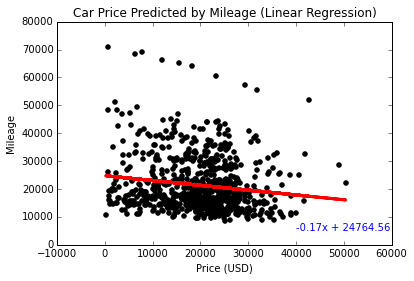

In [28]:
plt.scatter(mileage, price, color='black')
plt.plot(mileage, mileage_price.predict(mileage), color='red', linewidth=3)
plt.text(40000, 5000, '{:.2f}x + {:.2f}'.format(coef1, int1), color='blue')
plt.title("Car Price Predicted by Mileage (Linear Regression)")
plt.xlabel("Price (USD)")
plt.ylabel("Mileage")

In [30]:
lr.score(mileage, price)

0.020463447323489481

Not a good predictor!!

In [31]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [36]:
df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
5,22236,6,3.1,4,1,1,0
6,22576,6,3.1,4,1,1,0
7,22964,6,3.1,4,1,1,0
8,24021,6,3.1,4,1,0,1
9,27325,6,3.1,4,1,1,1


In [38]:
ind_var = df.loc[:, ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')]

In [41]:
price = df.Price.to_frame()

In [42]:
price.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [43]:
lr = linear_model.LinearRegression()
car_regr = lr.fit(ind_var, price)
car_regr_score = lr.score(ind_var, price)

In [44]:
car_regr_score

0.4462643536728379

Better, but not above the .8 threshold.

#Part 2, Find the Best Combination of Independent Variables

In [46]:
import itertools
independent_vars = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combos2 = list(itertools.combinations(independent_vars, 2))
combos3 = list(itertools.combinations(independent_vars, 3))
combos4 = list(itertools.combinations(independent_vars, 4))
combos5 = list(itertools.combinations(independent_vars, 5))
combos6 = list(itertools.combinations(independent_vars, 6))

In [47]:
combos = combos2 + combos3 + combos4 + combos5 + combos6

In [49]:
combos[-10:]

[('Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather'),
 ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'),
 ('Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound'),
 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'),
 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather'),
 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather'),
 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'),
 ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
 ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')]

In [55]:
choices = []


def regression_for(combo):
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

for combo in combos:
    combo = list(combo)
    regr, score = regression_for(combo)
    choices.append((combo, score))
top5 = sorted(choices, key=lambda x: x[1])[-5:] 
print(top5)
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

[(['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather'], 0.43001820483252673), (['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather'], 0.43014148406475605), (['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'], 0.4369402151237245), (['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'], 0.43780574153663798), (['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], 0.44569092105870245)]
(['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], 0.44569092105870245)
[ -1.70517079e-01   3.20012460e+03  -1.46339906e+03   6.20551127e+03
  -2.02440071e+03   3.32714331e+03] 7323.16430984


In [59]:
df.groupby(["Make", "Model", "Trim"]).count()

Price  Mileage  Type  Cylinder  \
Make      Model       Trim                                                  
Buick     Century     Sedan 4D                10       10    10        10   
          Lacrosse    CX Sedan 4D             10       10    10        10   
                      CXL Sedan 4D            10       10    10        10   
                      CXS Sedan 4D            10       10    10        10   
          Lesabre     Custom Sedan 4D         10       10    10        10   
                      Limited Sedan 4D        10       10    10        10   
          Park Avenue Sedan 4D                10       10    10        10   
                      Special Ed Ultra 4D     10       10    10        10   
Cadillac  CST-V       Sedan 4D                10       10    10        10   
          CTS         Sedan 4D                10       10    10        10   
          Deville     DHS Sedan 4D            10       10    10        10   
                      DTS Sedan 4D            10       10    10        10   
                      Sedan 4D                10       10    10        10   
          STS-V6      Sedan 4D                10       10    10        10   
          STS-V8      Sedan 4D                10       10    10        10   
          XLR-V8      Hardtop Conv 2D         10       10    10        10   
Chevrolet AVEO        LS Hatchback 4D         10       10    10        10   
                      LS Sedan 4D             10       10    10        10   
                      LT Hatchback 4D         10       10    10        10   
                      LT Sedan 4D             10       10    10        10   
                      SVM Hatchback 4D        10       10    10        10   
                      SVM Sedan 4D            10       10    10        10   
          Cavalier    Coupe 2D                10       10    10        10   
                      LS Coupe 2D             10       10    10        10   
                      LS Sedan 4D             10       10    10        10   
                      LS Sport Coupe 2D       10       10    10        10   
                      LS Sport Sedan 4D       10       10    10        10   
                      Sedan 4D                10       10    10        10   
          Classic     Sedan 4D                10       10    10        10   
          Cobalt      Coupe 2D                10       10    10        10   
...                                          ...      ...   ...       ...   
Pontiac   Bonneville  GXP Sedan 4D            10       10    10        10   
                      SE Sedan 4D             10       10    10        10   
                      SLE Sedan 4D            10       10    10        10   
          G6          GT Sedan 4D             10       10    10        10   
                      Sedan 4D                10       10    10        10   
          GTO         Coupe 2D                10       10    10        10   
          Grand Am    GT Coupe 2D             10       10    10        10   
                      SE Sedan 4D             10       10    10        10   
          Grand Prix  GT Sedan 4D             10       10    10        10   
                      GTP Sedan 4D            10       10    10        10   
                      Sedan 4D                10       10    10        10   
          Sunfire     Coupe 2D                10       10    10        10   
          Vibe        AWD Sportwagon 4D       10       10    10        10   
                      GT Sportwagon           10       10    10        10   
                      Sportwagon 4D           10       10    10        10   
SAAB      9-2X AWD    Linear Wagon 4D          4        4     4         4   
          9_3         Linear Conv 2D          10       10    10        10   
                      Linear Sedan 4D         10       10    10        10   
          9_3 HO      Aero Conv 2D            10       10    10        10   
                      Aero Sedan 4D    

In [60]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#Hard Mode -- Dummy Variables

In [62]:

# make dummify on model
dummy_ranks = pd.get_dummies(df['Model'], prefix='model')
print(dummy_ranks.head())

   model_9-2X AWD  model_9_3  model_9_3 HO  model_9_5  model_9_5 HO  \
0               0          0             0          0             0   
1               0          0             0          0             0   
2               0          0             0          0             0   
3               0          0             0          0             0   
4               0          0             0          0             0   

   model_AVEO  model_Bonneville  model_CST-V  model_CTS  model_Cavalier  \
0           0                 0            0          0               0   
1           0                 0            0          0               0   
2           0                 0            0          0               0   
3           0                 0            0          0               0   
4           0                 0            0          0               0   

       ...       model_Lacrosse  model_Lesabre  model_Malibu  \
0      ...                    0              0            

In [63]:
dummy_ranks.head(10)

,model_9-2X AWD,model_9_3,model_9_3 HO,model_9_5,model_9_5 HO,model_AVEO,model_Bonneville,model_CST-V,model_CTS,model_Cavalier,...,model_Lacrosse,model_Lesabre,model_Malibu,model_Monte Carlo,model_Park Avenue,model_STS-V6,model_STS-V8,model_Sunfire,model_Vibe,model_XLR-V8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
price = df.Price

In [65]:
price.head()

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

In [67]:
cols_to_keep = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
data = df[cols_to_keep].join(dummy_ranks.ix[:,:])
print(data.head())

   Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather  model_9-2X AWD  \
0     8221         6    3.1      4       1      1        1               0   
1     9135         6    3.1      4       1      1        0               0   
2    13196         6    3.1      4       1      1        0               0   
3    16342         6    3.1      4       1      0        0               0   
4    19832         6    3.1      4       1      0        1               0   

   model_9_3  model_9_3 HO      ...       model_Lacrosse  model_Lesabre  \
0          0             0      ...                    0              0   
1          0             0      ...                    0              0   
2          0             0      ...                    0              0   
3          0             0      ...                    0              0   
4          0             0      ...                    0              0   

   model_Malibu  model_Monte Carlo  model_Park Avenue  model_STS-V6  \
0        

In [70]:
regr = linear_model.LinearRegression()
regr.fit(data, price)
score = regr.score(data, price)
print(score)

0.972696003628


#Just using dummy variables for model will give you a score of .97   You probably don't need much more accuracy, but we can add make and trim pretty easily.

In [71]:
dummy_make = pd.get_dummies(df['Make'], prefix='make')
print(dummy_make.head())

   make_Buick  make_Cadillac  make_Chevrolet  make_Pontiac  make_SAAB  \
0           1              0               0             0          0   
1           1              0               0             0          0   
2           1              0               0             0          0   
3           1              0               0             0          0   
4           1              0               0             0          0   

   make_Saturn  
0            0  
1            0  
2            0  
3            0  
4            0  


In [72]:
data2 = data.join(dummy_make.ix[:,:])

In [73]:
data2.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,model_9-2X AWD,model_9_3,model_9_3 HO,...,model_STS-V8,model_Sunfire,model_Vibe,model_XLR-V8,make_Buick,make_Cadillac,make_Chevrolet,make_Pontiac,make_SAAB,make_Saturn
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
dummy_trim = pd.get_dummies(df['Trim'], prefix='trim')
print(dummy_trim.head())

   trim_AWD Sportwagon 4D  trim_Aero Conv 2D  trim_Aero Sedan 4D  \
0                       0                  0                   0   
1                       0                  0                   0   
2                       0                  0                   0   
3                       0                  0                   0   
4                       0                  0                   0   

   trim_Aero Wagon 4D  trim_Arc Conv 2D  trim_Arc Sedan 4D  trim_Arc Wagon 4D  \
0                   0                 0                  0                  0   
1                   0                 0                  0                  0   
2                   0                 0                  0                  0   
3                   0                 0                  0                  0   
4                   0                 0                  0                  0   

   trim_CX Sedan 4D  trim_CXL Sedan 4D  trim_CXS Sedan 4D         ...          \
0                 0    

In [75]:
data3 = data2.join(dummy_trim.ix[:,:])

In [76]:
data3.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,model_9-2X AWD,model_9_3,model_9_3 HO,...,trim_Quad Coupe 2D,trim_SE Sedan 4D,trim_SLE Sedan 4D,trim_SS Coupe 2D,trim_SS Sedan 4D,trim_SVM Hatchback 4D,trim_SVM Sedan 4D,trim_Sedan 4D,trim_Special Ed Ultra 4D,trim_Sportwagon 4D
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
regr = linear_model.LinearRegression()
regr.fit(data3, price)
score = regr.score(data3, price)
print(score)

0.992408261421


#Adding make and trim will get your score up to .992